In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

import wignerDistribution as wd
import generateDatasetMachineLearning as generateDataset

# Machine Learning study on the results of the 1D Pseudo-Wigner Distribution 

In this test, we are going to use the datasets created by the octave codes. The octave scripts is responsable for create holographic interference sets with an increasing number of point sources (starting at 1 and going up to 5).

After loading these data, we will apply the Wigner distribution in these data, train some machine learning algoritms and analyse the results.

### Load dictionaries

In [2]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

**Load files created by octave scripts**

In [3]:
# Folder's path
path = os.getcwd()

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'
hologram_dataset = loadMatFile(file_path, file_name, key)

# # Load reconstructed images dataset
# file_name = 'rDataset.mat'
# key = 'rDataset'
# reconstruction_dataset = loadMatFile(file_path, file_name, key)

# Load 3D points dataset
file_name = 'pDataset.mat'
key = 'pDataset'
points_dataset = loadMatFile(file_path, file_name, key)

print(hologram_dataset.shape)
# print(reconstruction_dataset.shape)
print(points_dataset.shape)

(200, 200, 500)
(1500, 3)


### Compute 1D Pseudo-Wigner Distribution

In [4]:
def calculate_1D_wigner_distribution(dataset, n, seq_legth, angle):
    """
    Calculates the  1D pseudo-Wigner distribution of the n first images (in gray levels) in the dataset. seq_length is the 
    length in pixels of the operating window and it has to be an odd number (9 is a common operative value). 
    The angle variable in degrees determines the spatial orientation of the distribution.
    """
    wd_results = []
    for i in range(n):
        test_image = dataset[:,:,i]
        wd_results.append(wd.wigner_distribution(test_image, seq_legth, angle))
    return wd_results

**Obs.: This part is very time-consuming!**

Example: to compute the wd distribution of 25 images, it took almost 5 minutes.
To compute the wd distribution of 125 images, it took 20 minutes.

In [5]:
%%time

dataset = hologram_dataset
n = hologram_dataset.shape[2]
seq_legth = 9 # length in pixels of the operating window
angle = 0     # spatial orientation of the distribution (degrees)

wd_results = calculate_1D_wigner_distribution(dataset, n, seq_legth, angle)

# Save to .npy file
np.save('wd_results', wd_results)

calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculating ...
calculat

**Save to .npy files**

In [ ]:
# Save to .npy file
path = os.getcwd()
file_path = path + '\\output\\wigner_distribution\\'
file_name = 'wd_results'

np.save(file_path + file_name, wd_results)

**Load .npy files**

In [5]:
# Load .npy file
path = os.getcwd()
file_path = path + '\\output\\wigner_distribution\\'
file_name = 'wd_results.npy'

wd_results_array = np.load(file_path + file_name)
print(wd_results_array.shape)

(125, 8, 200, 200)


### Generate database to ML

Each image compute in the 1D Pseudo-Wigner Distribution will produce 8 images as results, so it becomes impossible to work with so much data (number of holograms examples, 8, 200, 200).

We are going to choose some features to analyse the data. For each example, we will have **12 features**. The code is given in "generateDatasetMachineLearning.py"

**Example**

In [6]:
%%time

# Example of the Element class (represents one example)
array = wd_results_array[0]
print(array.shape)
target = 0

elem = generateDataset.createClassElement(array, target)
elem.__print__()

(8, 200, 200)
Element target: 0
Element features:
{'var': 9038164.010047385, 'std': 2423.3580812837204, 'mean_grad_M': 10492.464622876301, 'std_grad_M': 6895.747130193176, 'mean_grad_D': 0.08424803245590251, 'std_grad_D': 0.9884644034673948, 'mean_PC_X': 200.0, 'std_PC_X': 0.0, 'active_PC_X': 200.0, 'mean_PC_Y': 200.0, 'std_PC_Y': 0.0, 'active_PC_Y': 200.0}
Wall time: 5.24 s


In [7]:
# def computeTargets(array):
#     targets = []
#     y = 1
#     for i in range(len(array)):
#         targets.append(y)
#         if((i+1)%5 == 0):
#             y = y + 1
#     return targets

In [8]:
def compute_targets_array(nb_class, X_train):
    """
    Compute an array with the targets of the dataset. Note that the number on the array correspond to the number of 
    sources minus one. E.g. Y_array = 1, the number of point sources is 2.
    """
    # Number of the examples
    nb_holograms = X_train.shape[0]
    
    # Number of examples per class
    nb_holograms_class = int(nb_holograms / nb_class)
    
    # Y vector
    Y_array = np.zeros((nb_holograms,))
    counter = 1
    target = 0
    
    for i in range(nb_holograms):
        if counter == (nb_holograms_class + 1):
            target = target + 1
            counter = 1
        Y_array[i,] = target
        counter = counter + 1    
    
    return Y_array

**Example**

In [9]:
%%time

#Example of the Dataset class
array = wd_results_array[0:2, :, :, :]

target_list = [0, 0]

ds = generateDataset.createClassDataset(array, len(array), target_list)
print(ds.array.shape)

ds.wd_list[0].__print__()
ds.wd_list[1].__print__()

(2, 8, 200, 200)
Element target: 0
Element features:
{'var': 9038164.010047385, 'std': 2423.3580812837204, 'mean_grad_M': 10492.464622876301, 'std_grad_M': 6895.747130193176, 'mean_grad_D': 0.08424803245590251, 'std_grad_D': 0.9884644034673948, 'mean_PC_X': 200.0, 'std_PC_X': 0.0, 'active_PC_X': 200.0, 'mean_PC_Y': 200.0, 'std_PC_Y': 0.0, 'active_PC_Y': 200.0}
Element target: 0
Element features:
{'var': 10102737.439468458, 'std': 2758.6245499613856, 'mean_grad_M': 10150.69280422874, 'std_grad_M': 6619.4441429119015, 'mean_grad_D': 0.10372878271344015, 'std_grad_D': 0.6454573105699355, 'mean_PC_X': 200.0, 'std_PC_X': 0.0, 'active_PC_X': 200.0, 'mean_PC_Y': 200.0, 'std_PC_Y': 0.0, 'active_PC_Y': 200.0}
Wall time: 10.6 s


**Create dataset Class from npy array loaded**

To compute 25 images, it took  3 minutes.
To compute 125 images, it took minutes

In [23]:
%%time
 
dataset = generateDataset.generate_dataset(wd_results_array)
print(type(dataset))

KeyboardInterrupt: 

**Create dataset from npy file and return arrays**

In [24]:
%%time

X_array, Y_array = generateDataset.create_data_file('wd_results.npy')

print(X_array.shape)
print(Y_array.shape)

Creating dataset...

Finished creating dataset

(125, 12)
(125,)
Wall time: 17min 9s


**Save to .npy file**

In [182]:
np.save('X_array.npy', X_array)
np.save('Y_array.npy', Y_array)

**Load .npy files**

In [10]:
# Load database from .npy files
path = os.getcwd()
file_path = path + '\\output\\dataset\\'

X_array = np.load(file_path + 'X_array.npy')
print(X_array.shape)

Y_array = np.load(file_path + 'Y_array.npy')
print(Y_array.shape)

(125, 12)
(125,)


In [11]:
# Fix Y_array !!!!!!!!!!!!!!!!!!
# The function 'computeTargets' to compute the target's list in the file 'generateDatasetMachineLearning.py'
# is not correct

Y_array = compute_targets_array(5, X_array)
Y_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4.])

**Split the datset in train set and test set**

In [12]:
# Number of examples
m = X_array.shape[0]

# Number of features
n = X_array.shape[1]

# Split our data in two subsets: training set (80%) and testing set (20%)
m_train = int(m*0.8)
m_test = m - m_train

X_train = np.zeros((m_train, n))
Y_train = np.zeros((m_train, ))

X_test = np.zeros((m_test, n))
Y_test = np.zeros((m_test, ))

# Number of holograms per class
nb_holograms = 25

# Auxiliary variables
counter = 1
pos_train = 0
pos_test = 0

# Split the data
for i in range(m):
    if (counter <= 20):
        X_train[pos_train,:] = X_array[i,:]
        Y_train[pos_train] = Y_array[i]
        pos_train = pos_train + 1
    else:
        X_test[pos_test,:] = X_array[i,:]
        Y_test[pos_test] = Y_array[i]
        pos_test = pos_test + 1
    if (counter == 25):
        counter = 1
    else:
        counter = counter + 1
        
print('Data : ', X_array.shape, Y_array.shape)
print('Train: ', X_train.shape, Y_train.shape)
print('Test : ', X_test.shape, Y_test.shape)

Data :  (125, 12) (125,)
Train:  (100, 12) (100,)
Test :  (25, 12) (25,)


In [13]:
def normalize(arr):
    '''
    Function to normalize the features
    '''
    max_line = np.max(arr, axis=0)
    min_line = np.min(arr, axis=0)
    arr = (arr - min_line) / (max_line - min_line)
    return arr

In [14]:
# Normalize the features
X_train_norm = np.zeros((m_train, n))
for i in range(len(X_train)):
    X_train_norm[i,:] = normalize(X_train[i,:])

X_test_norm = np.zeros((m_test, n))
for i in range(len(X_test)):
    X_test_norm[i,:] = normalize(X_test[i,:])
    
print('Train norm: ', X_train_norm.shape)
print('Test norm : ', X_test_norm.shape)

Train norm:  (100, 12)
Test norm :  (25, 12)


## Machine Learning algorithms

In [15]:
import itertools
import pandas as pd
import joblib

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Evaluation methods

Functions used to analyse the accuracy of the classifier.

In [16]:
def plot_confusion_matrix(clf, data_x, data_y, nb_classes):
    classes = range(1,(nb_classes+1))
    
    Ypred = clf.predict(data_x)
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### K-Nearest Neighbors method

In [17]:
def knn_model(nb_k, X_train, Y_train):
    '''
    Train and fit the knn model
    '''
    # Train the classifier (clf)
    print('Training the KNN classifier...')
    clf = KNeighborsClassifier(n_neighbors = nb_k)
    print("Finished trainning KNN Model with " + str(nb_k) + " neighbors")
    
    # Fit the model
    return clf.fit(X_train, Y_train)

In [18]:
def visualize_model(clf, X_data, Y_data, filename, type_data):
    '''
    Predict the class labels for the provided data and plot the confusion matrix with the accuracy
    '''
    predicted = clf.predict(X_data)    
    plot_confusion_matrix(clf, X_data, Y_data, 5)
    plt.title(type_data + ' confusion matrix: accuracy of ' + str(round((accuracy_score(Y_data, predicted) * 100), 3)) + "%\n " + str(len(X_data)) +" examples used")
    plt.savefig(filename)

Training the KNN classifier...
Finished trainning KNN Model with 2 neighbors
Wall time: 242 ms


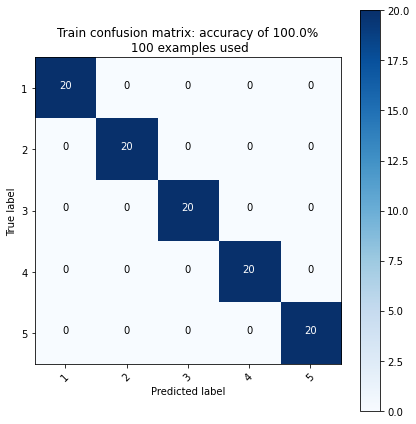

In [19]:
%%time

# Number of neighbors
nb_k = 2

# Train and fit the model
knn = knn_model(nb_k, X_train, Y_train)

# Save the knn classifier (avoid to retrain the model)
joblib.dump(knn, './output/machine_learning/knn_clf.joblib') 

# Visualize train results
visualize_model(knn, X_train, Y_train, './output/machine_learning/knn_train', 'Train')

Wall time: 175 ms


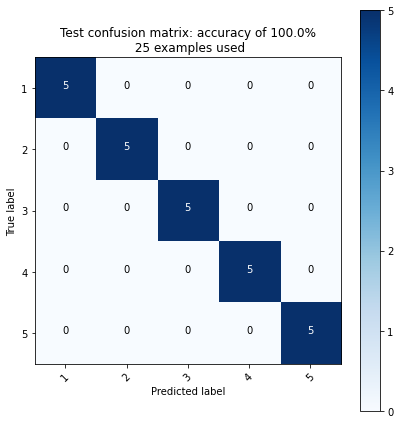

In [21]:
%%time

# Visualize test results
visualize_model(knn, X_test, Y_test, './output/machine_learning/knn_test', 'Test')

### Decision Tree method

In [22]:
def decision_tree_model(depth, X_train, Y_train):
    '''
    Train and fit the decision tree model
    '''
    # Train the classifier (clf)
    print('Training the Decision Tree classifier...')
    clf = DecisionTreeClassifier(max_depth = depth)
    print("Finished trainning Decision Tree Model with " + str(nb_k) + " depth")
    
    # Fit the model
    return clf.fit(X_train, Y_train)

Training the Decision Tree classifier...
Finished trainning Decision Tree Model with 2 depth
Wall time: 173 ms


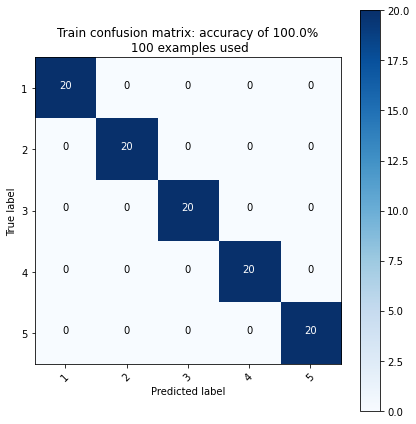

In [23]:
%%time

# The maximum depth of the tree
depth = 5

# Train and fit the model
decision_tree = decision_tree_model(depth, X_train, Y_train)

# Save the knn classifier (avoid to retrain the model)
joblib.dump(knn, './output/machine_learning/decision_tree_clf.joblib') 
    
# Visualize train results
visualize_model(decision_tree, X_train, Y_train, './output/machine_learning/decision_tree_train', 'Train')

Wall time: 167 ms


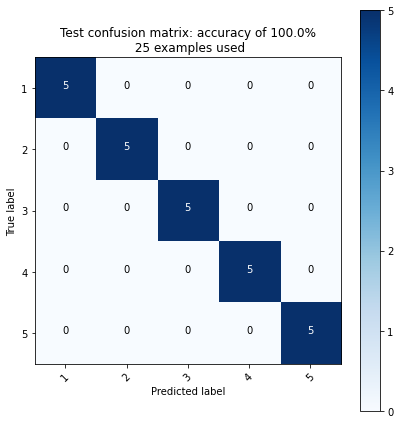

In [24]:
%%time

# Visualize test results
visualize_model(decision_tree, X_test, Y_test, './output/machine_learning/decision_tree_test', 'Test')

## Support Vector Machines method

In [25]:
def svm_model(X_train, Y_train):
    '''
    Train and fit the SVM model
    '''
    # Train the classifier (clf)
    print('Training the SVM classifier...')
    clf = svm.SVC()
    print("Finished trainning SVM Model")
    
    # Fit the model
    return clf.fit(X_train, Y_train)

Training the SVM classifier...
Finished trainning SVM Model
Wall time: 223 ms


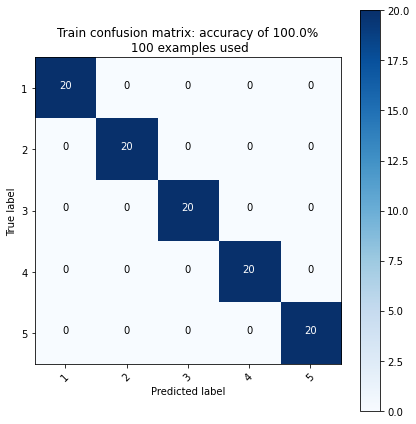

In [26]:
%%time

# Train and fit the model
svm_clf = svm_model(X_train, Y_train)

# Save the svm classifier (avoid to retrain the model)
joblib.dump(svm_clf, './output/machine_learning/svm_clf.joblib') 
    
# Visualize train results
visualize_model(svm_clf, X_train, Y_train, './output/machine_learning/svm_train', 'Train')

Wall time: 166 ms


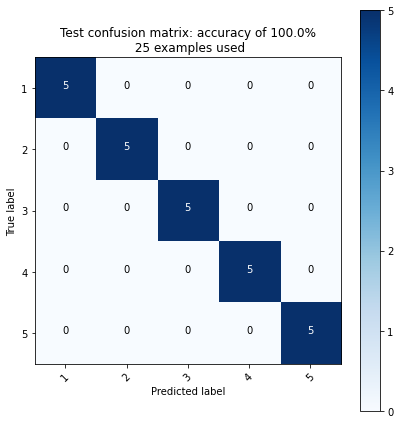

In [27]:
%%time

# Visualize test results
visualize_model(svm_clf, X_test, Y_test, './output/machine_learning/svm_test', 'Test')